In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import OneHotEncoder 
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import pickle

In [42]:
insurance_data=pd.read_csv('./Data/Medicalpremium.csv')

In [43]:
insurance_data.head(10)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,No,No,No,155,57,0,0,0,25000
1,60,1,No,No,No,180,73,0,0,0,29000
2,36,1,Yes,No,No,158,59,0,0,1,23000
3,52,1,Yes,No,Yes,183,93,0,0,2,28000
4,38,0,No,No,Yes,166,88,0,0,1,23000
5,30,0,No,No,No,160,69,1,0,1,23000
6,33,0,No,No,No,150,54,0,0,0,21000
7,23,0,No,No,No,181,79,1,0,0,15000
8,48,1,No,No,No,169,74,1,0,0,23000
9,38,0,No,No,No,182,93,0,0,0,23000


In [44]:
insurance_data.shape

(986, 11)

In [45]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      986 non-null    int64 
 1   Diabetes                 986 non-null    int64 
 2   BloodPressureProblems    986 non-null    object
 3   AnyTransplants           986 non-null    object
 4   AnyChronicDiseases       986 non-null    object
 5   Height                   986 non-null    int64 
 6   Weight                   986 non-null    int64 
 7   KnownAllergies           986 non-null    int64 
 8   HistoryOfCancerInFamily  986 non-null    int64 
 9   NumberOfMajorSurgeries   986 non-null    int64 
 10  PremiumPrice             986 non-null    int64 
dtypes: int64(8), object(3)
memory usage: 84.9+ KB


In [46]:
insurance_data.replace({'BloodPressureProblems': {'Yes':1,'No':0}}, inplace=True)
insurance_data.replace({'AnyTransplants': {'Yes':1,'No':0}}, inplace=True)
insurance_data.replace({'AnyChronicDiseases': {'Yes':1,'No':0}}, inplace=True)

In [47]:
insurance_data.head(10)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
5,30,0,0,0,0,160,69,1,0,1,23000
6,33,0,0,0,0,150,54,0,0,0,21000
7,23,0,0,0,0,181,79,1,0,0,15000
8,48,1,0,0,0,169,74,1,0,0,23000
9,38,0,0,0,0,182,93,0,0,0,23000


In [48]:
insurance_data.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [49]:
insurance_data.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

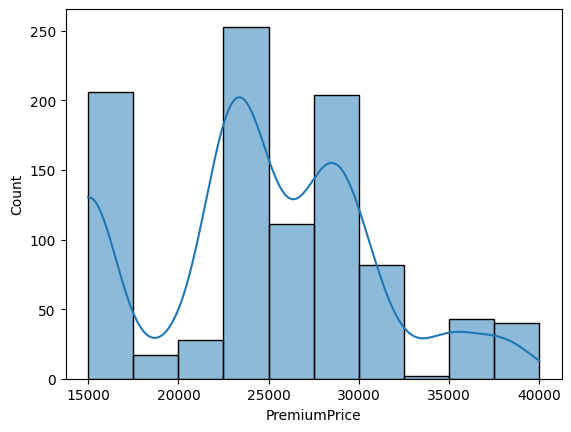

In [50]:
sns.histplot(data=insurance_data, x='PremiumPrice',bins=10, kde=True );

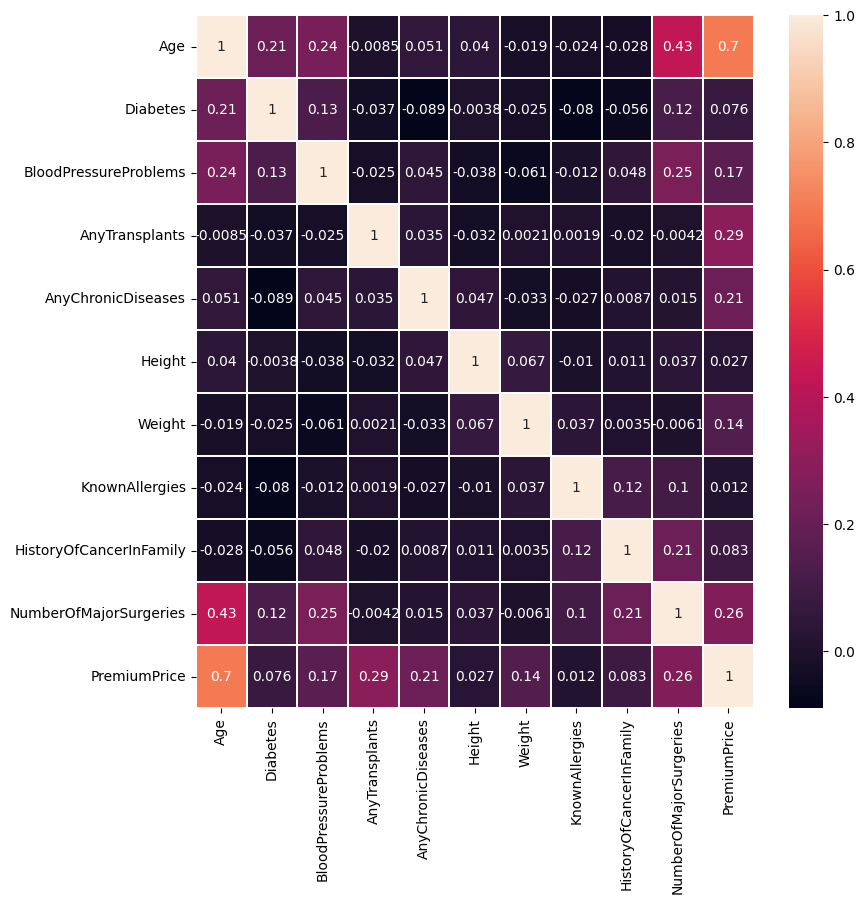

In [51]:
plt.figure(figsize=(9,9))
corr = insurance_data.corr()
sns.heatmap(corr, annot=True,linewidths=0.1);

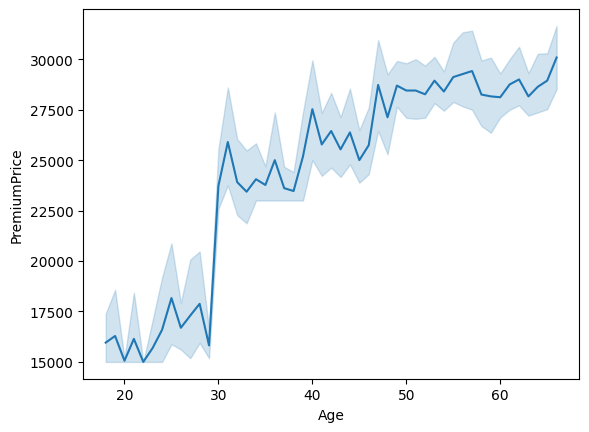

In [52]:
sns.lineplot(x=insurance_data.Age,y=insurance_data.PremiumPrice);

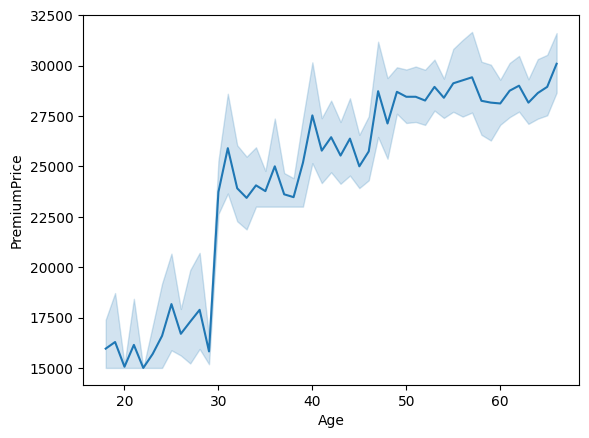

In [53]:
sns.lineplot(x=insurance_data.Age,y=insurance_data.PremiumPrice);

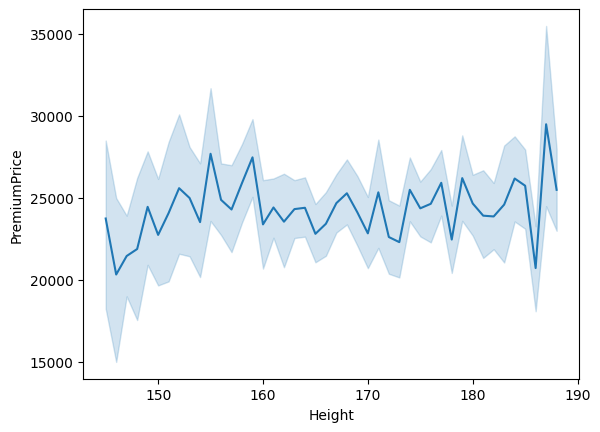

In [54]:
sns.lineplot(x=insurance_data.Height,y=insurance_data.PremiumPrice);

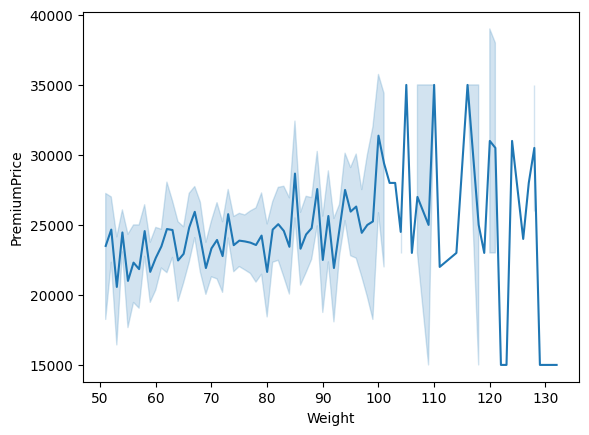

In [55]:
sns.lineplot(x=insurance_data.Weight,y=insurance_data.PremiumPrice);

In [56]:
insurance_data['BMI']=(insurance_data['Weight'])/((insurance_data['Height']/100)**2)
insurance_data.drop(columns=['Height','Weight'], inplace=True)

In [57]:
insurance_data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,0,0,0,25000,23.725286
1,60,1,0,0,0,0,0,0,29000,22.530864
2,36,1,1,0,0,0,0,1,23000,23.634033
3,52,1,1,0,1,0,0,2,28000,27.770313
4,38,0,0,0,1,0,0,1,23000,31.934969


In [58]:
under_index = insurance_data[insurance_data.BMI<18.4999].index
normal_index = insurance_data[(insurance_data.BMI>18.5) & (insurance_data.BMI<24.9999)].index
over_index = insurance_data[(insurance_data.BMI>25) & (insurance_data.BMI<29.9999)].index
obesity_index = insurance_data[insurance_data.BMI>30].index

insurance_data.loc[under_index,'BMI_Status'] = 'Under Weight'
insurance_data.loc[normal_index,'BMI_Status'] = 'Normal'
insurance_data.loc[over_index,'BMI_Status'] = 'Over Weight'
insurance_data.loc[obesity_index,'BMI_Status'] = 'Obesity'

In [59]:
insurance_data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,BMI_Status
0,45,0,0,0,0,0,0,0,25000,23.725286,Normal
1,60,1,0,0,0,0,0,0,29000,22.530864,Normal
2,36,1,1,0,0,0,0,1,23000,23.634033,Normal
3,52,1,1,0,1,0,0,2,28000,27.770313,Over Weight
4,38,0,0,0,1,0,0,1,23000,31.934969,Obesity


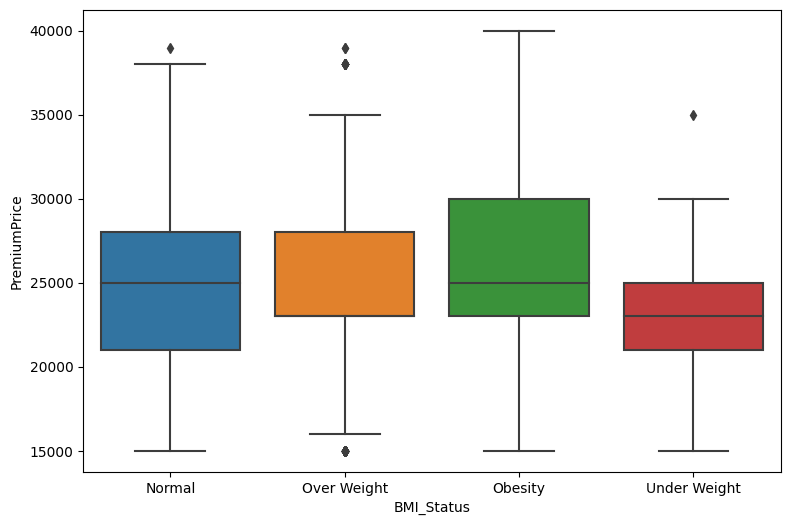

In [60]:
plt.figure(figsize=(9,6))
sns.boxplot(x='BMI_Status', y='PremiumPrice', data=insurance_data);

In [61]:
ohe = OneHotEncoder()
encoded = ohe.fit_transform(insurance_data[['BMI_Status']]).toarray()
encoded_insurance_data= pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['BMI_Status']))
insurance_data = pd.concat([insurance_data, encoded_insurance_data], axis=1)
insurance_data = insurance_data.drop(['BMI_Status','BMI'],axis=1)

In [62]:
insurance_data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI_Status_Normal,BMI_Status_Obesity,BMI_Status_Over Weight,BMI_Status_Under Weight
0,45,0,0,0,0,0,0,0,25000,1.0,0.0,0.0,0.0
1,60,1,0,0,0,0,0,0,29000,1.0,0.0,0.0,0.0
2,36,1,1,0,0,0,0,1,23000,1.0,0.0,0.0,0.0
3,52,1,1,0,1,0,0,2,28000,0.0,0.0,1.0,0.0
4,38,0,0,0,1,0,0,1,23000,0.0,1.0,0.0,0.0


In [63]:
insurance_data.to_csv('./Data/ModifiedData.csv', index=False)

In [64]:
Categorical_Variables = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases','KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']
BMI_Variables = ['BMI_Status_Normal','BMI_Status_Obesity','BMI_Status_Over Weight','BMI_Status_Under Weight']

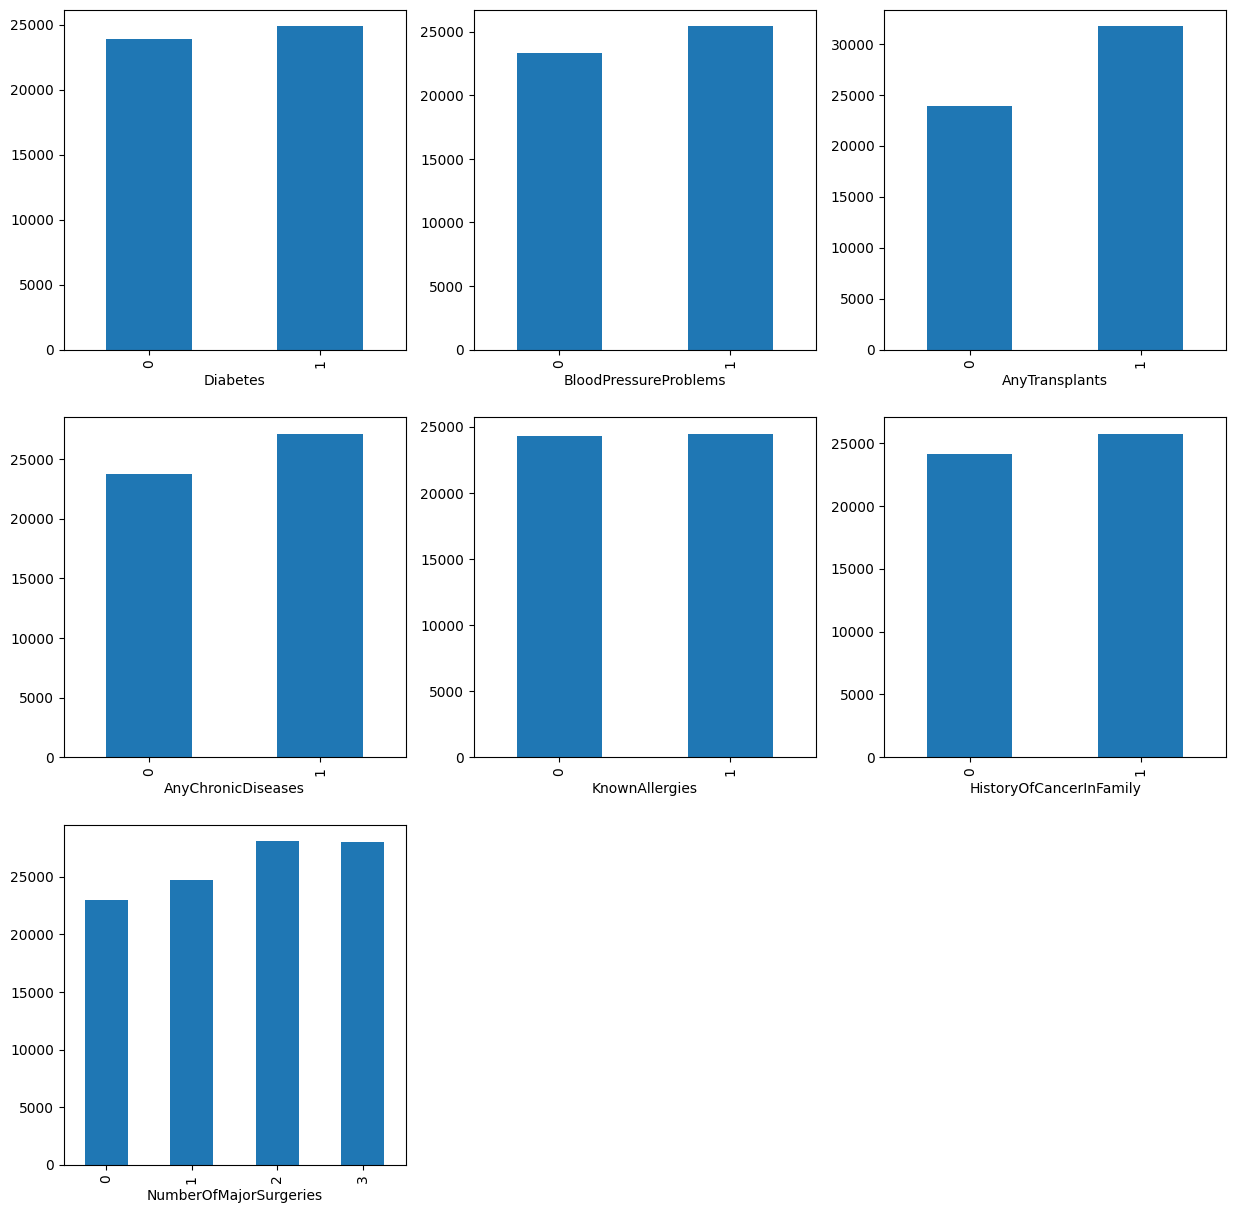

In [65]:
plt.figure(figsize=(15,15))
a = 3
b = 3
c = 1

for feature in Categorical_Variables:
    plt.subplot(a,b,c)
    insurance_data.groupby(feature)['PremiumPrice'].mean().plot.bar()
    c=c+1

plt.show();

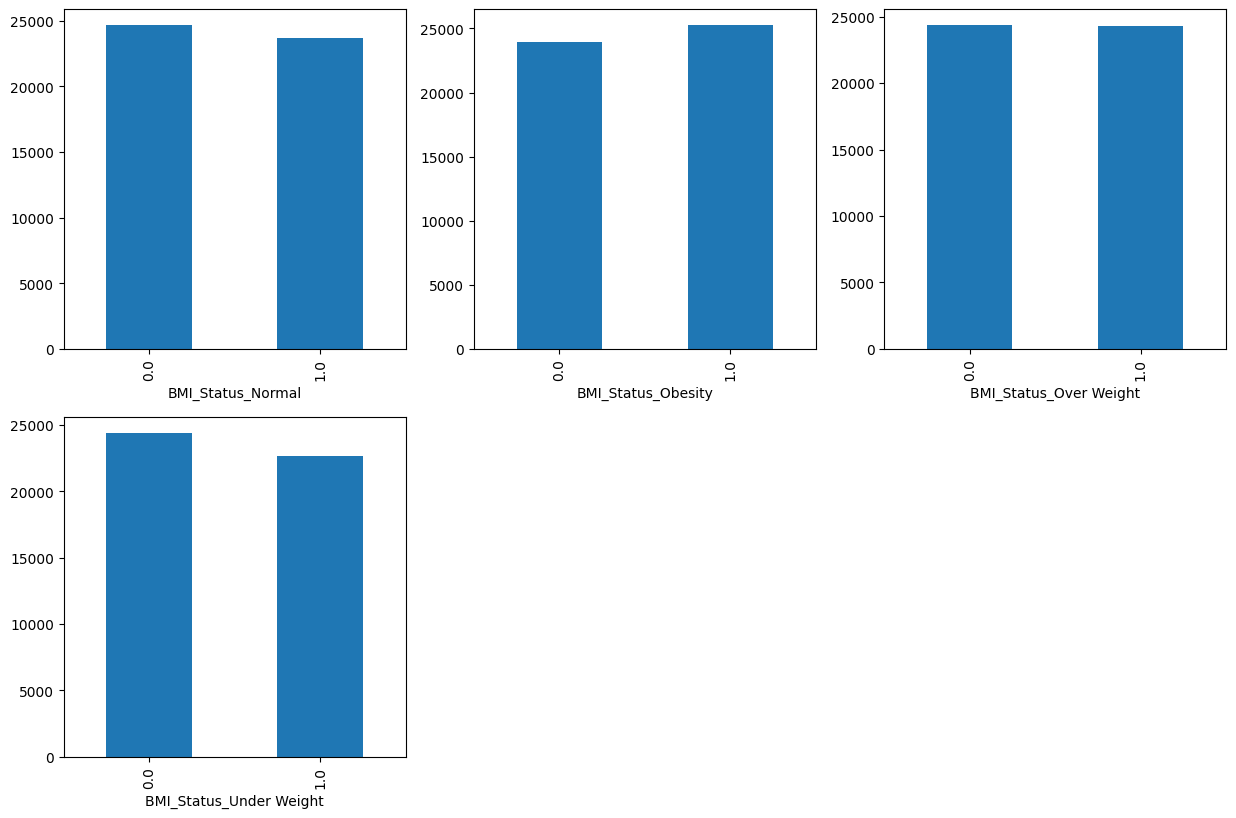

In [66]:
plt.figure(figsize=(15,15))
a = 3
b = 3
c = 1

for feature in BMI_Variables:
    plt.subplot(a,b,c)
    insurance_data.groupby(feature)['PremiumPrice'].mean().plot.bar()
    c=c+1
    
plt.show()

In [67]:
X = insurance_data.drop('PremiumPrice', axis =1)
y = insurance_data['PremiumPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

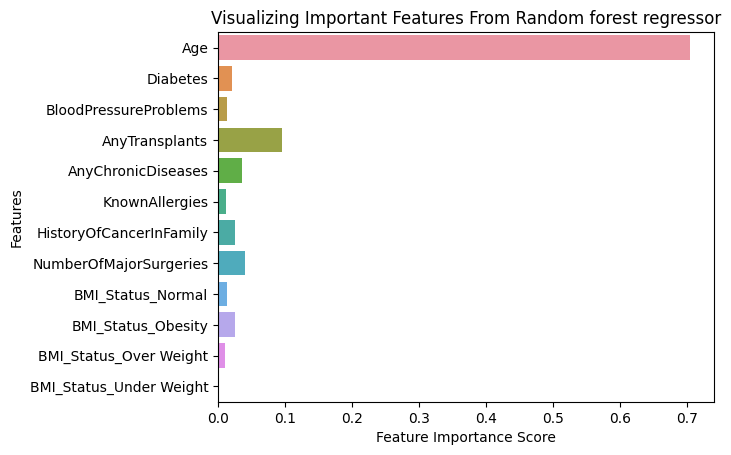

In [68]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train,y_train)
feature_imp1 = random_forest.feature_importances_
sns.barplot(x=feature_imp1, y=X.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features From Random forest regressor")
plt.show();

In [69]:
print(X.shape, X_train.shape, X_test.shape)

(986, 12) (887, 12) (99, 12)


In [70]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [71]:

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

Ridge()

In [72]:

y_train_pred = model.predict(X_train_scaled)
r2_train = metrics.r2_score(y_train,y_train_pred)
print("R squared value(Linear train):", r2_train)

R squared value(Linear train): 0.6353454583559657


In [73]:
y_pred=model.predict(X_test_scaled)
r2_test = metrics.r2_score(y_test,y_pred)
print("R squared value(Linear Test):", r2_test)

R squared value(Linear Test): 0.6564179688119247


In [74]:

y_train_pred = ridge.predict(X_train_scaled)
r2_train = metrics.r2_score(y_train,y_train_pred)
print("R squared value(ridge Train):", r2_train)

R squared value(ridge Train): 0.6354466462764872


In [75]:
y_pred=ridge.predict(X_test_scaled)
r2_test = metrics.r2_score(y_test,y_pred)
print("R squared value(ridge Test):", r2_test)

R squared value(ridge Test): 0.6543049386136643


In [76]:
with open('insurance_premium_model.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('insurance_premium_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ridge_premium_model.pkl', 'wb') as f:
    pickle.dump(ridge, f)

In [77]:
def get_user_input():
    age = int(input("Enter age: "))
    diabetes = int(input("Enter 1 if you have diabetes, else enter 0: "))
    blood_pressure = int(input("Enter 1 if you have bloodpressure any transplant, else enter 0: "))
    any_transplant = int(input("Enter 1 if you have undergone any transplant, else enter 0: "))
    any_chronic_diseases = int(input("Enter 1 if you have any chronic diseases, else enter 0: "))
    known_allergies = int(input("Enter 1 if you have any known allergies, else enter 0: "))
    cancer_in_family = int(input("Enter 1 if there is a history of cancer in your family, else enter 0: "))
    num_major_surgeries = int(input("Enter number of major surgeries: "))
    bmi_status_normal = int(input("Enter 1 if your BMI status is normal, else enter 0: "))
    bmi_status_obecity = int(input("Enter 1 if your BMI status indicates obesity, else enter 0: "))
    bmi_status_overweight = int(input("Enter 1 if your BMI status indicates overweight, else enter 0: "))
    bmi_status_underweight = int(input("Enter 1 if your BMI status indicates underweight, else enter 0: "))
    
    input_data = (age, diabetes, blood_pressure, any_transplant, any_chronic_diseases, known_allergies, cancer_in_family, num_major_surgeries, bmi_status_normal, bmi_status_obecity, bmi_status_overweight, bmi_status_underweight)
    
    return input_data

In [78]:
def predict_premium(input_data, scaler):
    inp_as_nparray = np.asarray(input_data)
    inp_reshaped = inp_as_nparray.reshape(1,-1)
    inp_scaled = scaler.transform(inp_reshaped)
    predict = model.predict(inp_scaled)
    prediction = ridge.predict(inp_scaled)
    return predict[0], prediction[0]

In [79]:
input_data= get_user_input()
print(input_data, scaler)

(60, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0) StandardScaler()


In [80]:
premium=predict_premium(input_data, scaler)
#print(premium[0][0])
#print(premium[1][0])
print(premium)

(28239.588047723748, 28119.70902499148)


c:\Users\Kaustubh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
